<a href="https://colab.research.google.com/github/Thiagogiovanni/projetos_de_estudo/blob/main/webcraping_requests_copa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web scraping + Nuvem de pontos**

<center><img alt="Analisando Airbnb" width="10%" src="https://s.glbimg.com/jo/g1/static/live/imagens/img_facebook.png?g1"></center> 

O site [G1](https://g1.globo.com/) é nacionalmente conhecido, sendo o maior portal de notícias do Brasil. Desde 2006 mantém o padrão Globo e com conteúdos multimídia vem tirando proveito da internet sobre os meios tradicionais de comunicação. Durante o ano de 2022 o portal teve uma grande importância na divulgação de notícias referentes ao maior evento do ano, a Copa do Mundo.


## Projeto sem selenium
Essa é uma outra versão de um projeto similiar de Web Scraping que fiz, o primeiro foi utilizando Selenium e agora apenas requests.

## Explicando sobre o projeto

A ideia desse projeto é criarmos um script capaz de acessar as informações sobre a Copa do Mundo no site do G1 e com isso fazermos uma nuvem de palavras, com a finalidade de termos uma noção sobre o que está ocorrendo em volta do evento.

**Nosso objetivo será recolher esses títulos em vermelho e os resumos referentes a eles**, por exemplo:

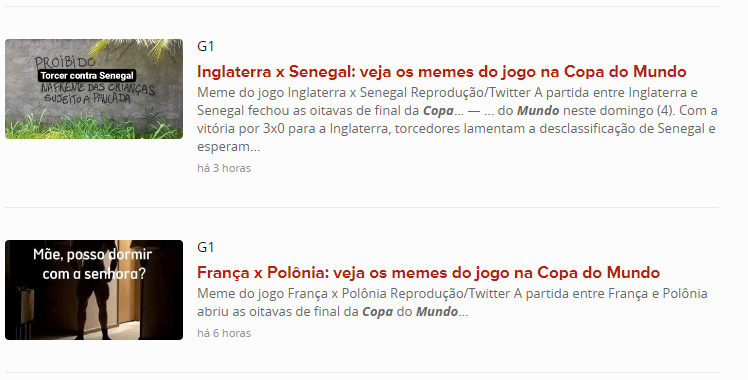

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get('https://g1.globo.com/busca/?q=COPA+DO+MUNDO&page=1')

content = response.content

In [3]:
site = BeautifulSoup(content, 'html.parser')

texto = []

for bloco in site.find_all(class_ = 'widget--info__text-container'): #entrando na classe que contem o que queremos acessar
    for href in bloco.find_all('a'):
        titulo = href.find(class_ = 'widget--info__title product-color')
        if (titulo != None):
            texto.append(titulo.text[7:-2]) #coloca esse titulo.text para não vir nada além do texto
        subtitulo = href.find(class_ = 'widget--info__description')
        if (subtitulo != None):
            texto.append(subtitulo.text[7:-2])
texto = ' '.join(texto)
print(texto)         

diferentes pontos, no início da tarde desta quinta-feira (24), dia da estreia do Brasil na Copa do Mundo 2022. Funcionários públicos... — ... das Torres, que liga o Centro à Zona Norte. 
Trânsito de Manaus registra engarrafamentos em dia de estreia do Brasil na Copa do Mundo
Vídeos mais assistidos no Amazonas. ro em quatro anos o mundo volta as suas atenções para a Copa do Mundo de Futebol. O maior evento esportivo do mundo é o momento em que a população de cada país participante se une para torcer por suas seleções. 
Todos sabemos a importância do futebol e . e Argentina disputam o título nesta domingo (18  duas seleções se tornará tricampeã mundi ter tatuado o rosto do ídolo no braço. E agora  promete ir mais além em caso de vitória da Argentina na decisão da Copa do Mundo... — ... não acontecendo. 
Com a seleção argentina alcançando a final da Copa do Mundo 2022, após vencer a Croácia por 3 a 0, no Catar. s do Camelódromo comentam sobre final da Copa do Mun investiram na compra de p

In [4]:
#Agora vamos de fato começar a criação da nuvem de palavras

#usaremos nltk para auxiliar em retirar as palavras "irrelevantes"

import nltk 
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese') + ['copa'] #tirar palavras que são comuns no portugues e a palavra copa
comment_words = '' #novo texto

tokens = texto.split() #quebrando o texto nos espaços em palavras sozinhas

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower() #deixando as palavras todas minusculas para n diferenciar Taxa e taxa, por exemplo

comment_words += " ".join(tokens)+" " #fazendo um novo texto com as palavras separadas por espaço e com as letras minusculas


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


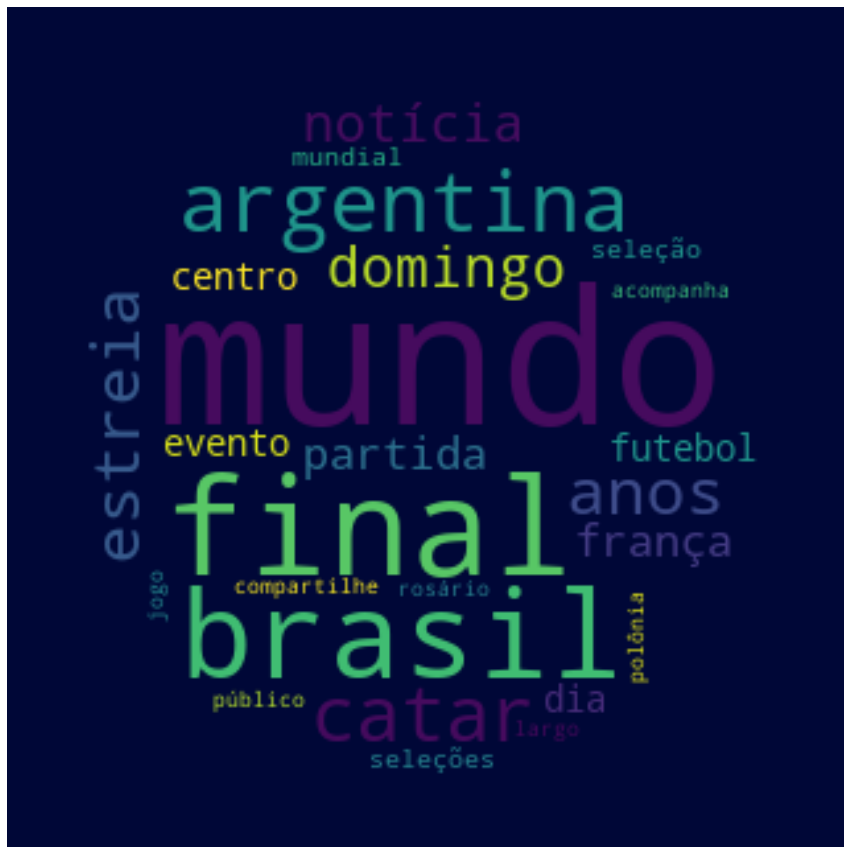

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image #limitar a nuvem na imagem q colocaremos
from wordcloud import WordCloud #vai desenhar as palavras de fato

mask = np.array(Image.open('/content/bola-de-futebol-preta.png')) #imagem por tras da nuvem

wordcloud = WordCloud(margin = 5,
                background_color ='rgb(0, 7, 55)',
                mask = mask,
                stopwords = stopwords,
                min_font_size = 8).generate(comment_words) #de onde vai gerar a nuvem


default_colors = wordcloud.to_array() #pegar as informações e deixando ela de forma que conseguimos desenhar
plt.figure(figsize= [15,20])
plt.imshow(default_colors, interpolation="bilinear") #pegar a nuvem de palavras q foi transformada e mostra na minha tela
#wordcloud.to_file("wordcloud.png")
plt.axis("off") #sem eixos x e y
plt.show()